In [1]:
import utils
import os
import numpy as np
import matplotlib.pyplot as plt
results_dir = './results'
fig_dir = './figs'
fig_size = (12, 3)
fig_size_1 = (6, 3)
fig_size_2 = (6, 3)
fig_size_3 = (4, 3)
os.makedirs(fig_dir, exist_ok=True)

In [2]:
def get_acc(result):
    result = result.split("\n")
    acc = float(result[-4].split()[1])
    return acc


def get_folds_acc(prefix="model_BERT_None_0_None_0", k_folds=5, force=False):
    accs = []
    for i in range(k_folds):
        path = f"{prefix}_{k_folds}fold_{i}.pkl"
        if utils.check_file_exists(path, results_dir):
            result = utils.load_file(path, results_dir)
            acc = get_acc(result)
            accs.append(acc)
        else:
            if force:
                raise FileNotFoundError(f"File {path} not found")
    return np.mean(accs)


def get_metrics(result):
    result = result.split("\n")
    metrics = {}
    for line in result[2:-5]:
        line = line.split()
        if len(line) == 0:
            continue
        metrics[line[0]] = {}
        metrics[line[0]]["precision"] = float(line[1])
        metrics[line[0]]["recall"] = float(line[2])
        metrics[line[0]]["f1-score"] = float(line[3])
        metrics[line[0]]["support"] = float(line[4])

    print(metrics)


def print_acc(acc, model_name):
    print(f"Model: {model_name}")
    print(f"Accuracy: {acc*100:.2f}%")

In [3]:
models = ["BERT", "RoBERTa", "OPT"]
transformer_results = {model: get_folds_acc(f"model_{model}_None_0_None_0", 5) for model in models}
for model, acc in transformer_results.items():
    print_acc(acc, model)


Model: BERT
Accuracy: 90.80%
Model: RoBERTa
Accuracy: 92.00%
Model: OPT
Accuracy: 91.00%


{'LSTM': {2: 0.66, 5: 0.768, 10: 0.844, 20: 0.868, 50: 0.8800000000000001, 100: 0.8779999999999999}, 'TextCNN': {2: 0.64, 5: 0.75, 10: 0.8400000000000001, 20: 0.868, 50: 0.8800000000000001, 100: 0.876}}


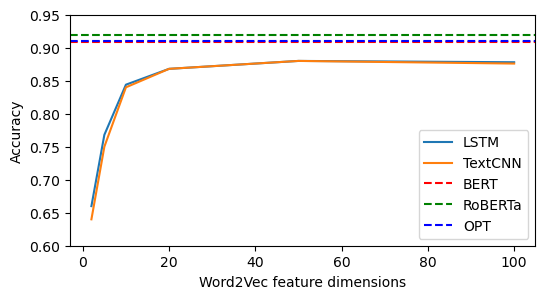

In [4]:
results_nn = {"LSTM": {}, "TextCNN": {}}

for feature in [2, 5, 10, 20, 50, 100]:
    results_nn["LSTM"][feature] = get_folds_acc(f"model_LSTM_Word2Vec_{feature}_None_0", 5, force=True)
    results_nn["TextCNN"][feature] = get_folds_acc(f"model_TextCNN_Word2Vec_{feature}_None_0", 5, force=True)

print(results_nn)


plt.figure(figsize=fig_size_1)

plt.plot(results_nn["LSTM"].keys(), results_nn["LSTM"].values(), label="LSTM")
plt.plot(results_nn["TextCNN"].keys(), results_nn["TextCNN"].values(), label="TextCNN")
plt.axhline(transformer_results["BERT"], color="red", linestyle="--", label="BERT")
plt.axhline(transformer_results["RoBERTa"], color="green", linestyle="--", label="RoBERTa")
plt.axhline(transformer_results["OPT"], color="blue", linestyle="--", label="OPT")
plt.ylim(0.6, 0.95)
plt.xlabel("Word2Vec feature dimensions")
plt.ylabel("Accuracy")
plt.legend()

utils.save_fig(plt, "nn_results", fig_dir)
plt.show()

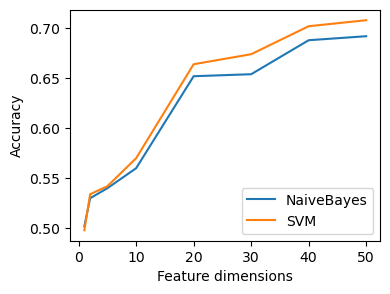

<Figure size 640x480 with 0 Axes>

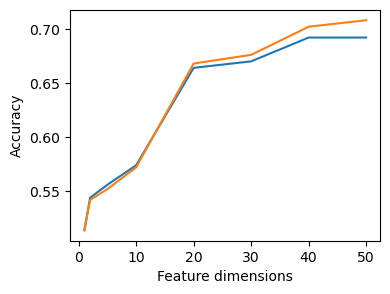

<Figure size 640x480 with 0 Axes>

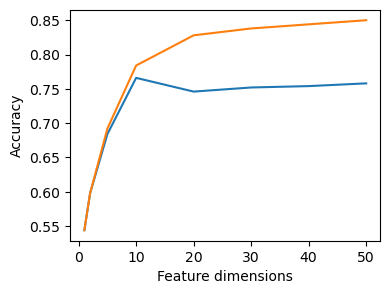

<Figure size 640x480 with 0 Axes>

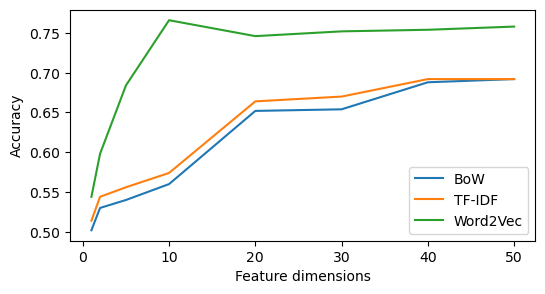

<Figure size 640x480 with 0 Axes>

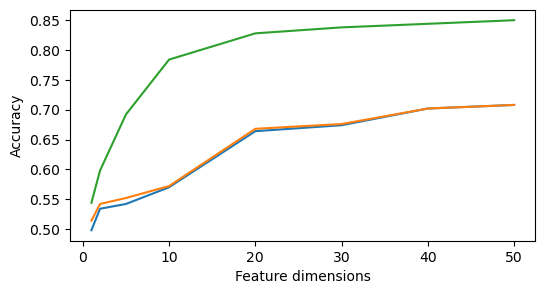

<Figure size 640x480 with 0 Axes>

In [5]:

results = {}
flag = True
for extract in ["BoW", "TF-IDF", "Word2Vec"]:
    results[extract] = {}
    for method in ["NaiveBayes", "SVM"]:
        results[extract][method] = {}
        for feature in [1, 2, 5, 10, 20, 30, 40, 50]:
            results[extract][method][feature] = get_folds_acc(f"model_{method}_{extract}_{feature}_None_0", 5, force=True)

    plt.figure(figsize=fig_size_3)
    for method in ["NaiveBayes", "SVM"]:
        plt.plot(results[extract][method].keys(), results[extract][method].values(), label=method)
    plt.xlabel("Feature dimensions")
    plt.ylabel("Accuracy")
    if flag:
        plt.legend()
        flag = False
    utils.save_fig(plt, f"{extract}_extract", fig_dir)
    plt.show()
    plt.clf()

flag = True
for method in ["NaiveBayes", "SVM"]:
    plt.figure(figsize=fig_size_2)
    for extract in ["BoW", "TF-IDF", "Word2Vec"]:
        plt.plot(results[extract][method].keys(), results[extract][method].values(), label=extract)
    plt.xlabel("Feature dimensions")
    plt.ylabel("Accuracy")
    if flag:
        plt.legend()
        flag = False
    utils.save_fig(plt, f"{method}_method", fig_dir)
    plt.show()
    plt.clf()

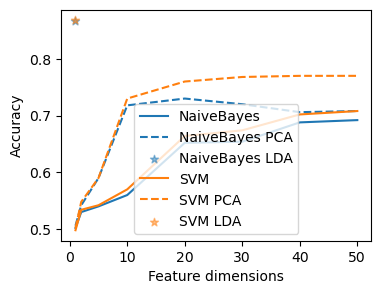

<Figure size 640x480 with 0 Axes>

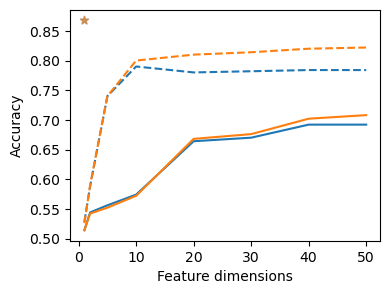

<Figure size 640x480 with 0 Axes>

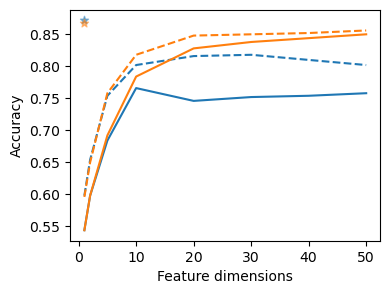

<Figure size 640x480 with 0 Axes>

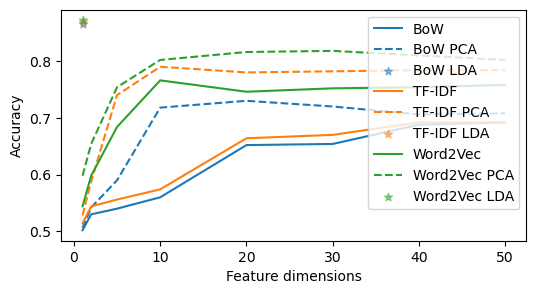

<Figure size 640x480 with 0 Axes>

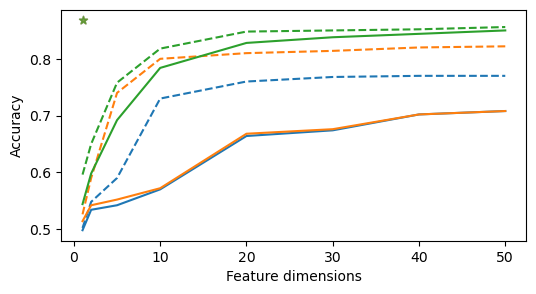

<Figure size 640x480 with 0 Axes>

In [6]:
max_features = {"BoW": 1000, "TF-IDF": 1000, "Word2Vec": 300}

results_pca = {}

for extract in ["BoW", "TF-IDF", "Word2Vec"]:
    results_pca[extract] = {}
    for method in ["NaiveBayes", "SVM"]:
        results_pca[extract][method] = {}
        for pca in [1, 2, 5, 10, 20, 30, 40, 50]:
            results_pca[extract][method][pca] = get_folds_acc(f"model_{method}_{extract}_{max_features[extract]}_PCA_{pca}", 5, force=True)

results_lda = {}
for extract in ["BoW", "TF-IDF", "Word2Vec"]:
    results_lda[extract] = {}
    for method in ["NaiveBayes", "SVM"]:
        results_lda[extract][method] = get_folds_acc(f"model_{method}_{extract}_{max_features[extract]}_LDA_1", 5, force=True)



flag = True
for extract in ["BoW", "TF-IDF", "Word2Vec"]:
    plt.figure(figsize=fig_size_3)
    for method in ["NaiveBayes", "SVM"]:
        plt.plot(results[extract][method].keys(), results[extract][method].values(), label=method)
        plt.plot(results_pca[extract][method].keys(), results_pca[extract][method].values(), label=f"{method} PCA", linestyle="--", color=plt.gca().lines[-1].get_color())
        plt.scatter(1, results_lda[extract][method], color=plt.gca().lines[-1].get_color(), label=f"{method} LDA", marker="*", alpha=0.5)

    plt.xlabel("Feature dimensions")
    plt.ylabel("Accuracy")
    if flag:
        plt.legend()
        flag = False
    utils.save_fig(plt, f"{extract}_extract_pca", fig_dir)
    plt.show()
    plt.clf()


flag = True
for method in ["NaiveBayes", "SVM"]:
    plt.figure(figsize=fig_size_2)
    for extract in ["BoW", "TF-IDF", "Word2Vec"]:
        plt.plot(results[extract][method].keys(), results[extract][method].values(), label=extract)
        plt.plot(results_pca[extract][method].keys(), results_pca[extract][method].values(), label=f"{extract} PCA", linestyle="--", color=plt.gca().lines[-1].get_color())
        plt.scatter(1, results_lda[extract][method], color=plt.gca().lines[-1].get_color(), label=f"{extract} LDA", marker="*", alpha=0.5)
    plt.xlabel("Feature dimensions")
    plt.ylabel("Accuracy")
    if flag:
        plt.legend()
        flag = False
    utils.save_fig(plt, f"{method}_method_pca", fig_dir)
    plt.show()
    plt.clf()

In [7]:
best_results = {}

for method in ["NaiveBayes", "SVM"]:
    best_acc = 0
    for extract in ["BoW", "TF-IDF", "Word2Vec"]:
        acc = max(results[extract][method].values())
        if acc > best_acc:
            best_acc = acc
    for extract in ["BoW", "TF-IDF", "Word2Vec"]:
        acc = max(results_pca[extract][method].values())
        if acc > best_acc:
            best_acc = acc
    acc = results_lda[extract][method]
    if acc > best_acc:
        best_acc = acc
    best_results[method] = best_acc

for model in results_nn.keys():
    best_results[model] = max(results_nn[model].values())
    
for model in transformer_results.keys():
    best_results[model] = transformer_results[model]

table = """
\\begin{table}[htbp]
\\centering
\\resizebox{0.8\\textwidth}{!}{
\\begin{tabular}{c|cc|cc|ccc}
\\toprule[1pt]
\\midrule
\\multirow{2}{*}{\\textbf{Methods}} & \\multicolumn{2}{c|}{\\textbf{Non NNs}} & \\multicolumn{2}{c|}{\\textbf{Non-Transformer}} & \\multicolumn{3}{c}{\\textbf{Transformers}} \\\\
& %s & %s & %s & %s & %s & %s & %s-1.3B \\\\
\\midrule
\\textbf{Accuracy (\\%c)} & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f \\\\
\\midrule
\\bottomrule[1pt]
\\end{tabular}
}
\\caption{Best accuracy of each models}
\\label{tab:best_models}
\\end{table}
""" % tuple(
    [model for model in best_results.keys()]
    + ["%"]
    + [acc * 100 for acc in best_results.values()]
)
print(table)


\begin{table}[htbp]
\centering
\resizebox{0.8\textwidth}{!}{
\begin{tabular}{c|cc|cc|ccc}
\toprule[1pt]
\midrule
\multirow{2}{*}{\textbf{Methods}} & \multicolumn{2}{c|}{\textbf{Non NNs}} & \multicolumn{2}{c|}{\textbf{Non-Transformer}} & \multicolumn{3}{c}{\textbf{Transformers}} \\
& NaiveBayes & SVM & LSTM & TextCNN & BERT & RoBERTa & OPT-1.3B \\
\midrule
\textbf{Accuracy (\%)} & 87.20 & 86.80 & 88.00 & 88.00 & 90.80 & 92.00 & 91.00 \\
\midrule
\bottomrule[1pt]
\end{tabular}
}
\caption{Best accuracy of each models}
\label{tab:best_models}
\end{table}



In [8]:
table = """
\\begin{table}[htbp]
\\centering
\\resizebox{0.8\\textwidth}{!}{
\\begin{tabular}{c|cc|cc|ccc}
\\toprule[1pt]
\\midrule
\\multirow{2}{*}{\\textbf{Extractor}} & \\multicolumn{2}{c|}{\\textbf{Non-NN}} & \\multicolumn{2}{c|}{\\textbf{Non-Transformer}} & \\multicolumn{3}{c}{\\textbf{Transformers}} \\\\
& %s & %s & %s & %s & %s & %s & %s-1.3B \\\\
\\midrule
""" % tuple(
    [model for model in best_results.keys()]
)
for extractor in ["BoW", "TF-IDF", "Word2Vec"]:
    table += "\\textbf{" + f"{extractor}" + "}"
    for method in ["NaiveBayes", "SVM"]:
        table += f"& {max(results[extractor][method].values())*100:.2f}"
    for method in ["LSTM", "TextCNN"]:
        if extractor == "Word2Vec":
            table += f"& {max(results_nn[method].values())*100:.2f}"
        else:
            table += f" & - "
    for method in ["BERT", "RoBERTa", "OPT"]:
        table += f"& -"
    table += "\\\\\n"
table += "\\midrule\n"

for extractor in ["BoW", "TF-IDF", "Word2Vec"]:
    table += "\\textbf{" + f"{extractor} + PCA" + "}"
    for method in ["NaiveBayes", "SVM"]:
        table += f"& {max(results_pca[extractor][method].values())*100:.2f}"
    for method in ["LSTM", "TextCNN", "BERT", "RoBERTa", "OPT"]:
        table += f"& -"
    table += "\\\\\n"
table += "\\midrule\n"
for extractor in ["BoW", "TF-IDF", "Word2Vec"]:
    table += "\\textbf{" + f"{extractor} + LDA" + "}"
    for method in ["NaiveBayes", "SVM"]:
        table += f"& {results_lda[extractor][method]*100:.2f}"
    for method in ["LSTM", "TextCNN", "BERT", "RoBERTa", "OPT"]:
        table += f"& -"
    table += "\\\\\n"
table += "\\midrule\n"

table += "\\textbf{Tokenizer}"
for method in ["NaiveBayes", "SVM", "LSTM", "TextCNN"]:
    table += f"& -"
for method in ["BERT", "RoBERTa", "OPT"]:
    table += f"& {transformer_results[method]*100:.2f}"
table += "\\\\\n"

table += "\\midrule\n"

table += "\\textbf{Best}"
for method in best_results.keys():
    table += f"& {best_results[method]*100:.2f}"
table += "\\\\\n"

table += """
\\midrule
\\bottomrule[1pt]
\\end{tabular}
}
\\caption{Best accuracy of each models}
\\label{tab:best_models}
\\end{table}
"""
print(table)


\begin{table}[htbp]
\centering
\resizebox{0.8\textwidth}{!}{
\begin{tabular}{c|cc|cc|ccc}
\toprule[1pt]
\midrule
\multirow{2}{*}{\textbf{Extractor}} & \multicolumn{2}{c|}{\textbf{Non-NN}} & \multicolumn{2}{c|}{\textbf{Non-Transformer}} & \multicolumn{3}{c}{\textbf{Transformers}} \\
& NaiveBayes & SVM & LSTM & TextCNN & BERT & RoBERTa & OPT-1.3B \\
\midrule
\textbf{BoW}& 69.20& 70.80 & -  & - & -& -& -\\
\textbf{TF-IDF}& 69.20& 70.80 & -  & - & -& -& -\\
\textbf{Word2Vec}& 76.60& 85.00& 88.00& 88.00& -& -& -\\
\midrule
\textbf{BoW + PCA}& 73.00& 77.00& -& -& -& -& -\\
\textbf{TF-IDF + PCA}& 79.00& 82.20& -& -& -& -& -\\
\textbf{Word2Vec + PCA}& 81.80& 85.60& -& -& -& -& -\\
\midrule
\textbf{BoW + LDA}& 86.60& 86.80& -& -& -& -& -\\
\textbf{TF-IDF + LDA}& 86.80& 86.80& -& -& -& -& -\\
\textbf{Word2Vec + LDA}& 87.20& 86.80& -& -& -& -& -\\
\midrule
\textbf{Tokenizer}& -& -& -& -& 90.80& 92.00& 91.00\\
\midrule
\textbf{Best}& 87.20& 86.80& 88.00& 88.00& 90.80& 92.00& 91.00\\

\midrule
\bo

In [9]:
best_results = {}

for method in ["NaiveBayes", "SVM"]:
    best_acc = 0
    for extract in ["BoW", "TF-IDF", "Word2Vec"]:
        acc = max(results[extract][method].values())
        if acc > best_acc:
            best_acc = acc
    best_results[method] = best_acc
for method in ["NaiveBayes", "SVM"]:
    best_acc = 0
    for extract in ["BoW", "TF-IDF", "Word2Vec"]:
        acc = max(results_pca[extract][method].values())
        if acc > best_acc:
            best_acc = acc
    best_results[method + " PCA"] = best_acc
for method in ["NaiveBayes", "SVM"]:
    best_acc = 0
    acc = results_lda[extract][method]
    if acc > best_acc:
        best_acc = acc
    best_results[method + " LDA"] = best_acc

for model in results_nn.keys():
    best_results[model] = max(results_nn[model].values())
    
for model in transformer_results.keys():
    best_results[model] = transformer_results[model]

table = """
\\begin{table}[htbp]
\\centering
\\resizebox{\\textwidth}{!}{
\\begin{tabular}{c|cc|cc|cc|cc|ccc}
\\toprule[1pt]
\\midrule
\\multirow{2}{*}{\\textbf{Extractor}} & \\multicolumn{2}{c|}{\\textbf{Non-NN}} & \\multicolumn{2}{c|}{\\textbf{w/ PCA}} & \\multicolumn{2}{c|}{\\textbf{w/ LDA}} & \\multicolumn{2}{c|}{\\textbf{Non-Transformer}} & \\multicolumn{3}{c}{\\textbf{Transformers}} \\\\
& GNB & SVM & GNB & SVM & GNB & SVM & LSTM & TextCNN & BERT & RoBERTa & OPT \\\\
\\midrule
"""
for extractor in ["BoW", "TF-IDF", "Word2Vec"]:
    table += "\\textbf{" + f"{extractor}" + "}"
    for method in ["NaiveBayes", "SVM"]:
        table += f"& {max(results[extractor][method].values())*100:.2f}"
    for method in ["NaiveBayes", "SVM"]:
        table += f"& {max(results_pca[extractor][method].values())*100:.2f}"
    for method in ["NaiveBayes", "SVM"]:
        table += f"& {results_lda[extractor][method]*100:.2f}"
    for method in ["LSTM", "TextCNN"]:
        if extractor == "Word2Vec":
            table += f"& {max(results_nn[method].values())*100:.2f}"
        else:
            table += f" & - "
    for method in ["BERT", "RoBERTa", "OPT"]:
        table += f"& -"
    table += "\\\\\n"
table += "\\midrule\n"
table += "\\textbf{Tokenizer}"
for method in ["NaiveBayes", "SVM", "NaiveBayes", "SVM", "NaiveBayes", "SVM", "LSTM", "TextCNN"]:
    table += f"& -"
for method in ["BERT", "RoBERTa", "OPT"]:
    table += f"& {transformer_results[method]*100:.2f}"
table += "\\\\\n"
table += "\\midrule\n"
table += "\\textbf{Best}"
for method in best_results.keys():
    table += f"& {best_results[method]*100:.2f}"
table += "\\\\\n"

table += """
\\midrule
\\bottomrule[1pt]
\\end{tabular}
}
\\caption{Overall performance of each models}
\\label{tab:overall_models}
\\end{table}
"""
print(table)


\begin{table}[htbp]
\centering
\resizebox{\textwidth}{!}{
\begin{tabular}{c|cc|cc|cc|cc|ccc}
\toprule[1pt]
\midrule
\multirow{2}{*}{\textbf{Extractor}} & \multicolumn{2}{c|}{\textbf{Non-NN}} & \multicolumn{2}{c|}{\textbf{w/ PCA}} & \multicolumn{2}{c|}{\textbf{w/ LDA}} & \multicolumn{2}{c|}{\textbf{Non-Transformer}} & \multicolumn{3}{c}{\textbf{Transformers}} \\
& GNB & SVM & GNB & SVM & GNB & SVM & LSTM & TextCNN & BERT & RoBERTa & OPT \\
\midrule
\textbf{BoW}& 69.20& 70.80& 73.00& 77.00& 86.60& 86.80 & -  & - & -& -& -\\
\textbf{TF-IDF}& 69.20& 70.80& 79.00& 82.20& 86.80& 86.80 & -  & - & -& -& -\\
\textbf{Word2Vec}& 76.60& 85.00& 81.80& 85.60& 87.20& 86.80& 88.00& 88.00& -& -& -\\
\midrule
\textbf{Tokenizer}& -& -& -& -& -& -& -& -& 90.80& 92.00& 91.00\\
\midrule
\textbf{Best}& 76.60& 85.00& 81.80& 85.60& 87.20& 86.80& 88.00& 88.00& 90.80& 92.00& 91.00\\

\midrule
\bottomrule[1pt]
\end{tabular}
}
\caption{Overall performance of each models}
\label{tab:overall_models}
\end{table}



In [10]:
results_1 = {
    "w/o": { extract: results[extract]["SVM"][1] 
        for extract in ["BoW", "TF-IDF", "Word2Vec"]},
    "PCA": { extract: results_pca[extract]["SVM"][1]
        for extract in ["BoW", "TF-IDF", "Word2Vec"]},
    "LDA": { extract: results_lda[extract]["SVM"]
        for extract in ["BoW", "TF-IDF", "Word2Vec"]}
}
results_1

table = """
\\begin{wraptable}{r}{0.4\\textwidth}
\\centering
\\resizebox{0.4\\textwidth}{!}{
\\begin{tabular}{c|ccc}
\\toprule[1pt]
\\midrule
\\textbf{Reduction} & \\textbf{BoW} & \\textbf{TF-IDF} & \\textbf{Word2Vec} \\\\
\\midrule
"""
for reduction in ["w/o", "PCA", "LDA"]:
    table += f"\\textbf{{{reduction}}}"
    for extract in ["BoW", "TF-IDF", "Word2Vec"]:
        table += f"& {results_1[reduction][extract]*100:.2f}"
    table += "\\\\\n"
table += """
\\midrule
\\bottomrule[1pt]
\\end{tabular}
}
\\caption{Performance of SVM with 1 dimension feature reduction.}
\\label{tab:1dim_results}
\\end{wraptable}
"""
print(table)



\begin{wraptable}{r}{0.4\textwidth}
\centering
\resizebox{0.4\textwidth}{!}{
\begin{tabular}{c|ccc}
\toprule[1pt]
\midrule
\textbf{Reduction} & \textbf{BoW} & \textbf{TF-IDF} & \textbf{Word2Vec} \\
\midrule
\textbf{w/o}& 49.80& 51.40& 54.40\\
\textbf{PCA}& 50.20& 52.60& 59.60\\
\textbf{LDA}& 86.80& 86.80& 86.80\\

\midrule
\bottomrule[1pt]
\end{tabular}
}
\caption{Performance of SVM with 1 dimension feature reduction.}
\label{tab:1dim_results}
\end{wraptable}



In [11]:
results_2 = {
    "w/o": { extract: results[extract]["SVM"][2] 
        for extract in ["BoW", "TF-IDF", "Word2Vec"]},
    "PCA": { extract: results_pca[extract]["SVM"][2]
        for extract in ["BoW", "TF-IDF", "Word2Vec"]}
}

table = """
\\begin{wraptable}{r}{0.4\\textwidth}
\\centering
\\resizebox{0.4\\textwidth}{!}{
\\begin{tabular}{c|ccc}
\\toprule[1pt]
\\midrule
\\textbf{Reduction} & \\textbf{BoW} & \\textbf{TF-IDF} & \\textbf{Word2Vec} \\\\
\\midrule
"""
for reduction in ["w/o", "PCA"]:
    table += f"\\textbf{{{reduction}}}"
    for extract in ["BoW", "TF-IDF", "Word2Vec"]:
        table += f"& {results_2[reduction][extract]*100:.2f}"
    table += "\\\\\n"
table += """
\\midrule
\\bottomrule[1pt]
\\end{tabular}
}
\\caption{Performance of SVM with 2 dimension feature reduction.}
\\label{tab:2dim_results}
\\end{wraptable}
"""
print(table)


\begin{wraptable}{r}{0.4\textwidth}
\centering
\resizebox{0.4\textwidth}{!}{
\begin{tabular}{c|ccc}
\toprule[1pt]
\midrule
\textbf{Reduction} & \textbf{BoW} & \textbf{TF-IDF} & \textbf{Word2Vec} \\
\midrule
\textbf{w/o}& 53.40& 54.20& 59.80\\
\textbf{PCA}& 54.80& 59.00& 65.00\\

\midrule
\bottomrule[1pt]
\end{tabular}
}
\caption{Performance of SVM with 2 dimension feature reduction.}
\label{tab:2dim_results}
\end{wraptable}



In [12]:
temp_dir = "./temp"
data, labels = utils.load_file("preprocessed_data.pkl", temp_dir)

In [13]:
flag = True
for extract in ["BoW", "TF-IDF", "Word2Vec"]:
    features = utils.load_file(f"feature_{extract}_2.pkl", temp_dir)
    if extract == "Word2Vec":
        features = np.array([np.mean(x, axis=0) for x in features])
    plt.figure(figsize=(4, 4))
    markers = {'positive': 'o', 'negative': 'x'}
    for label in ['positive', 'negative']:
        plt.scatter(features[labels == label, 0], features[labels == label, 1], label=label, marker=markers[label], s=2)
    if flag:
        plt.legend()
        flag = False
    utils.save_fig(plt, f"{extract}_features", fig_dir, file_type="png")
    plt.clf()

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [14]:
for extract in ["BoW", "TF-IDF", "Word2Vec"]:
    features = utils.load_file(f"reduce_PCA_2_feature_{extract}_{max_features[extract]}.pkl", temp_dir)
    plt.figure(figsize=(4, 4))
    markers = {'positive': 'o', 'negative': 'x'}
    for label in ['positive', 'negative']:
        plt.scatter(features[labels == label, 0], features[labels == label, 1], label=label, marker=markers[label], s=2)
    if flag:
        plt.legend()
        flag = False
    utils.save_fig(plt, f"{extract}_PCA_2_features", fig_dir, file_type="png")
    plt.clf()

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [15]:
for extract in ["BoW", "TF-IDF", "Word2Vec"]:
    features = utils.load_file(f"feature_{extract}_1.pkl", temp_dir)
    if extract == "Word2Vec":
        features = np.array([np.mean(x, axis=0) for x in features])
    plt.figure(figsize=fig_size_3)
    for label in ['positive', 'negative']:
        plt.hist(features[labels == label], bins=50, alpha=0.5, label=label)
    if flag:
        plt.legend()
        flag = False
    utils.save_fig(plt, f"{extract}_features_hist", fig_dir)
    plt.clf()
    

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

In [16]:
for extract in ["BoW", "TF-IDF", "Word2Vec"]:
    features = utils.load_file(f"reduce_PCA_1_feature_{extract}_{max_features[extract]}.pkl", temp_dir)
    plt.figure(figsize=fig_size_3)
    for label in ['positive', 'negative']:
        plt.hist(features[labels == label], bins=50, alpha=0.5, label=label)
    if flag:
        plt.legend()
        flag = False
    utils.save_fig(plt, f"{extract}_PCA_1_features_hist", fig_dir)
    plt.clf()


<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

In [17]:
for extract in ["BoW", "TF-IDF", "Word2Vec"]:
    features = utils.load_file(f"reduce_LDA_1_feature_{extract}_{max_features[extract]}.pkl", temp_dir)
    plt.figure(figsize=fig_size_3)
    for label in ['positive', 'negative']:
        plt.hist(features[labels == label], bins=50, alpha=0.5, label=label)
    if flag:
        plt.legend()
        flag = False
    utils.save_fig(plt, f"{extract}_LDA_1_features_hist", fig_dir)
    plt.clf()

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

In [18]:
ori_data, ori_labels = utils.load_data("imdb_reviews.csv")

In [19]:
len_ori = [len(x) for x in ori_data]
rank = np.argsort(len_ori)

table = """
\\begin{table}[t]
\\centering
\\resizebox{\\textwidth}{!}{
\\begin{tabular}{c|c|c}
\\toprule[1pt]
\\midrule
\\textbf{Sentiment} & \\textbf{Original Data} & \\textbf{Preprocessed Data}\\\\
\\midrule
"""


def print_str_k_per_line(s, k=50):
    table = "\\begin{tabular}{l}\n"
    for i in range(0, len(s), k):
        table += "    \\footnotesize{\\texttt{" + f"{s[i:i+k]}" + "}} \\\\\n"
    table += "\\end{tabular}"
    return table


for op in ["positive", "negative"]:
    j = 50
    n_examples = 3
    table += (
        "\\multirow{" + f"{n_examples}" + "}{*}{\\textbf{" + f"{op.capitalize()}" + "}}"
    )
    for i in range(0, n_examples):
        while ori_labels[rank[j]] != op:
            j += 1
        table += (
            " & "
            + print_str_k_per_line(ori_data[rank[j]])
            + " & "
            + print_str_k_per_line(data[rank[j]])
            + " \\\\\n"
        )
        if i < n_examples - 1:
            table += "\\cmidrule{2-3}\n"
        else:
            table += "\\midrule\n"
        j += 1
table += """
\\bottomrule[1pt]
\\end{tabular}
}
\\caption{Comparison between original and preprocessed data}
\\label{tab:data_comparison}
\\end{table}
"""
print(table)



\begin{table}[t]
\centering
\resizebox{\textwidth}{!}{
\begin{tabular}{c|c|c}
\toprule[1pt]
\midrule
\textbf{Sentiment} & \textbf{Original Data} & \textbf{Preprocessed Data}\\
\midrule
\multirow{3}{*}{\textbf{Positive}} & \begin{tabular}{l}
    \footnotesize{\texttt{Brilliant movie. The drawings were just amazing. T}} \\
    \footnotesize{\texttt{oo bad it ended before it begun. I´ve waited 21 ye}} \\
    \footnotesize{\texttt{ars for a sequel, but nooooo!!!}} \\
\end{tabular} & \begin{tabular}{l}
    \footnotesize{\texttt{brilliant movie drawings amazing bad ended begun i}} \\
    \footnotesize{\texttt{ve waited years sequel nooooo}} \\
\end{tabular} \\
\cmidrule{2-3}
 & \begin{tabular}{l}
    \footnotesize{\texttt{My favorite movie. What a great story this really }} \\
    \footnotesize{\texttt{was. I'd just like to be able to buy a copy of it }} \\
    \footnotesize{\texttt{but this does not seem possible.}} \\
\end{tabular} & \begin{tabular}{l}
    \footnotesize{\texttt{favorite m